# Feature extraction using 1/3 octave filters

## 1. Preparing a csv-file

In [1]:
import csv 

user_mode = False

In [2]:
# if user_mode == 'y':
#     csv_name = input("give your csv-file a name: ") + '.csv'
# else:
#     csv_name = "th_oct_feature.csv"

# n_th_octvs = 32
# n_classes = 10
# header = 'fn class'
# for i in range(1, n_th_octvs):
#     header += f' th_octv{i}'
# header = header.split()

# csv_fp = 'Datasets/Feature_extraction/' + csv_name
# csv_file = open(csv_fp, 'w', newline='')
# with csv_file:
#     writer = csv.writer(csv_file)
#     writer.writerow(header)

## 2. Filter calculation

In [5]:
# core params:

fs = 48000
fmin = 20
fmax = 20000
oct_bw_ratio = 1/3  # octave / amount of subdivisions

n_coeffs_p_section = 6
n_sections = 3

# this is weird to calculate automatically and stays constant anyways
dec_factor = [  1, 1, 1, 1, 
                2, 2, 2, 
                4, 4, 4, 
                8, 8, 8, 
                16, 16, 16, 16, 
                16, 16, 16, 16, 
                16, 16, 16, 16, 
                16, 16, 16, 16, 
                16, 16]

std_csv_fp = "Datasets/Feature_extraction/th_oct_coeffs.csv"
std_scaling_fp = "Datasets/Feature_extraction/scalings.csv"


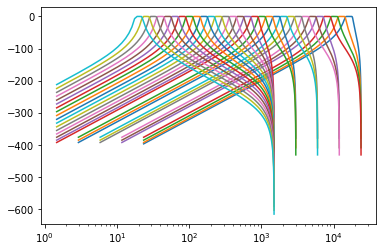

In [10]:
import octafilt3r.filter as o3

fcs, fls, fus, n_bands = o3.gen_fc_fl_fu(fmax, fmin, oct_bw_ratio)

for i in range(n_bands):
    o3.gen_bandpass(int(fs/dec_factor[i]), fls[i], fus[i], _order=6, _display=True)